In [2]:
from sklearn.datasets import load_boston

boston = load_boston()
dir(boston)

['DESCR', 'data', 'feature_names', 'filename', 'target']

In [8]:
pd.set_option('display.float_format', '{:.2f}'.format)
plt.rcParams['axes.grid'] = True
plt.rcParams['figure.figsize'] = (12, 6)

In [4]:
dfx = pd.DataFrame(boston.data, columns=boston.feature_names)
dfy = pd.DataFrame(boston.target, columns=['MEDV'])

In [5]:
df = pd.concat([dfx, dfy], axis=1)
df.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88,11.9


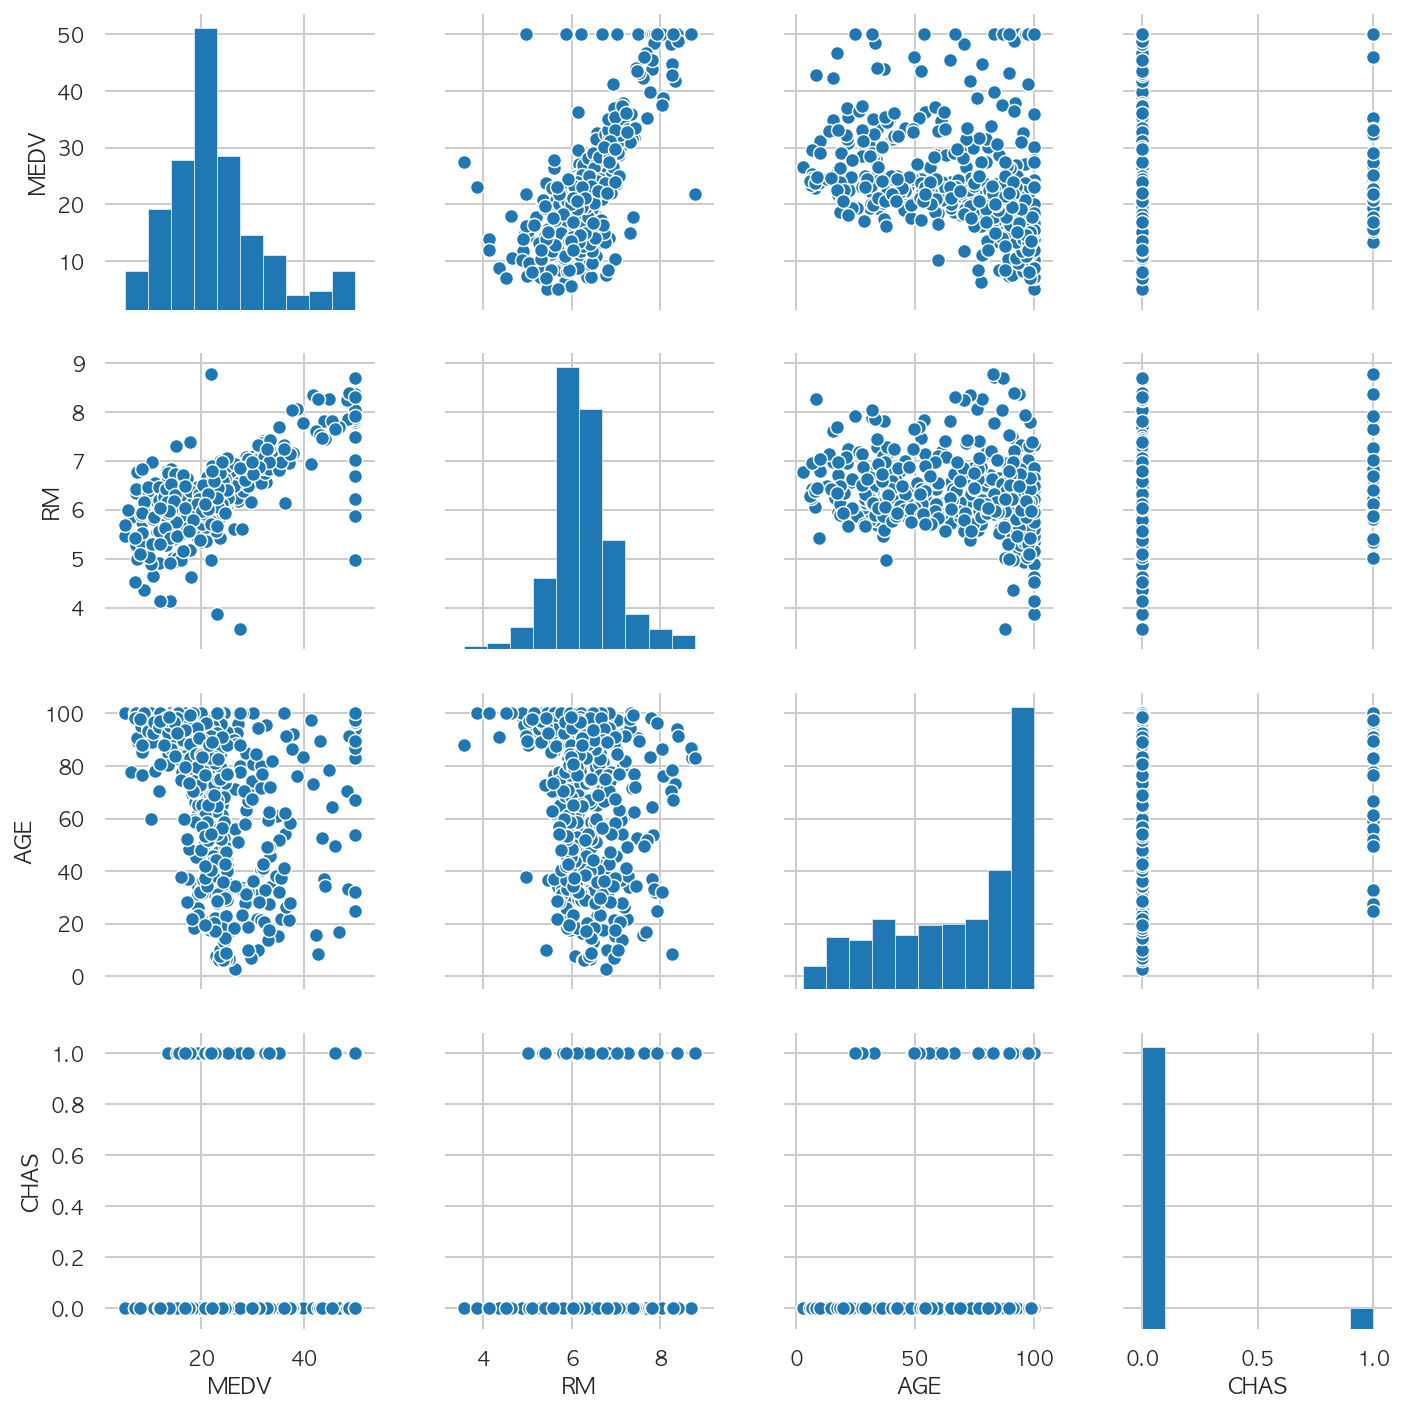

In [9]:
sns.pairplot(df[["MEDV", "RM", "AGE", "CHAS"]])
plt.show()

In [10]:
from sklearn.datasets import load_diabetes

diabetes = load_diabetes()
df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
df['target'] = diabetes.target
df.tail()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
437,0.04,0.05,0.02,0.06,-0.01,-0.00,-0.03,-0.00,0.03,0.01,178.00
438,-0.01,0.05,-0.02,-0.07,0.05,0.08,-0.03,0.03,-0.02,0.04,104.00
439,0.04,0.05,-0.02,0.02,-0.04,-0.01,-0.02,-0.01,-0.05,0.02,132.00
440,-0.05,-0.04,0.04,0.00,0.02,0.02,-0.03,0.03,0.04,-0.03,220.00
441,-0.05,-0.04,-0.07,-0.08,0.08,0.03,0.17,-0.04,-0.00,0.00,57.00


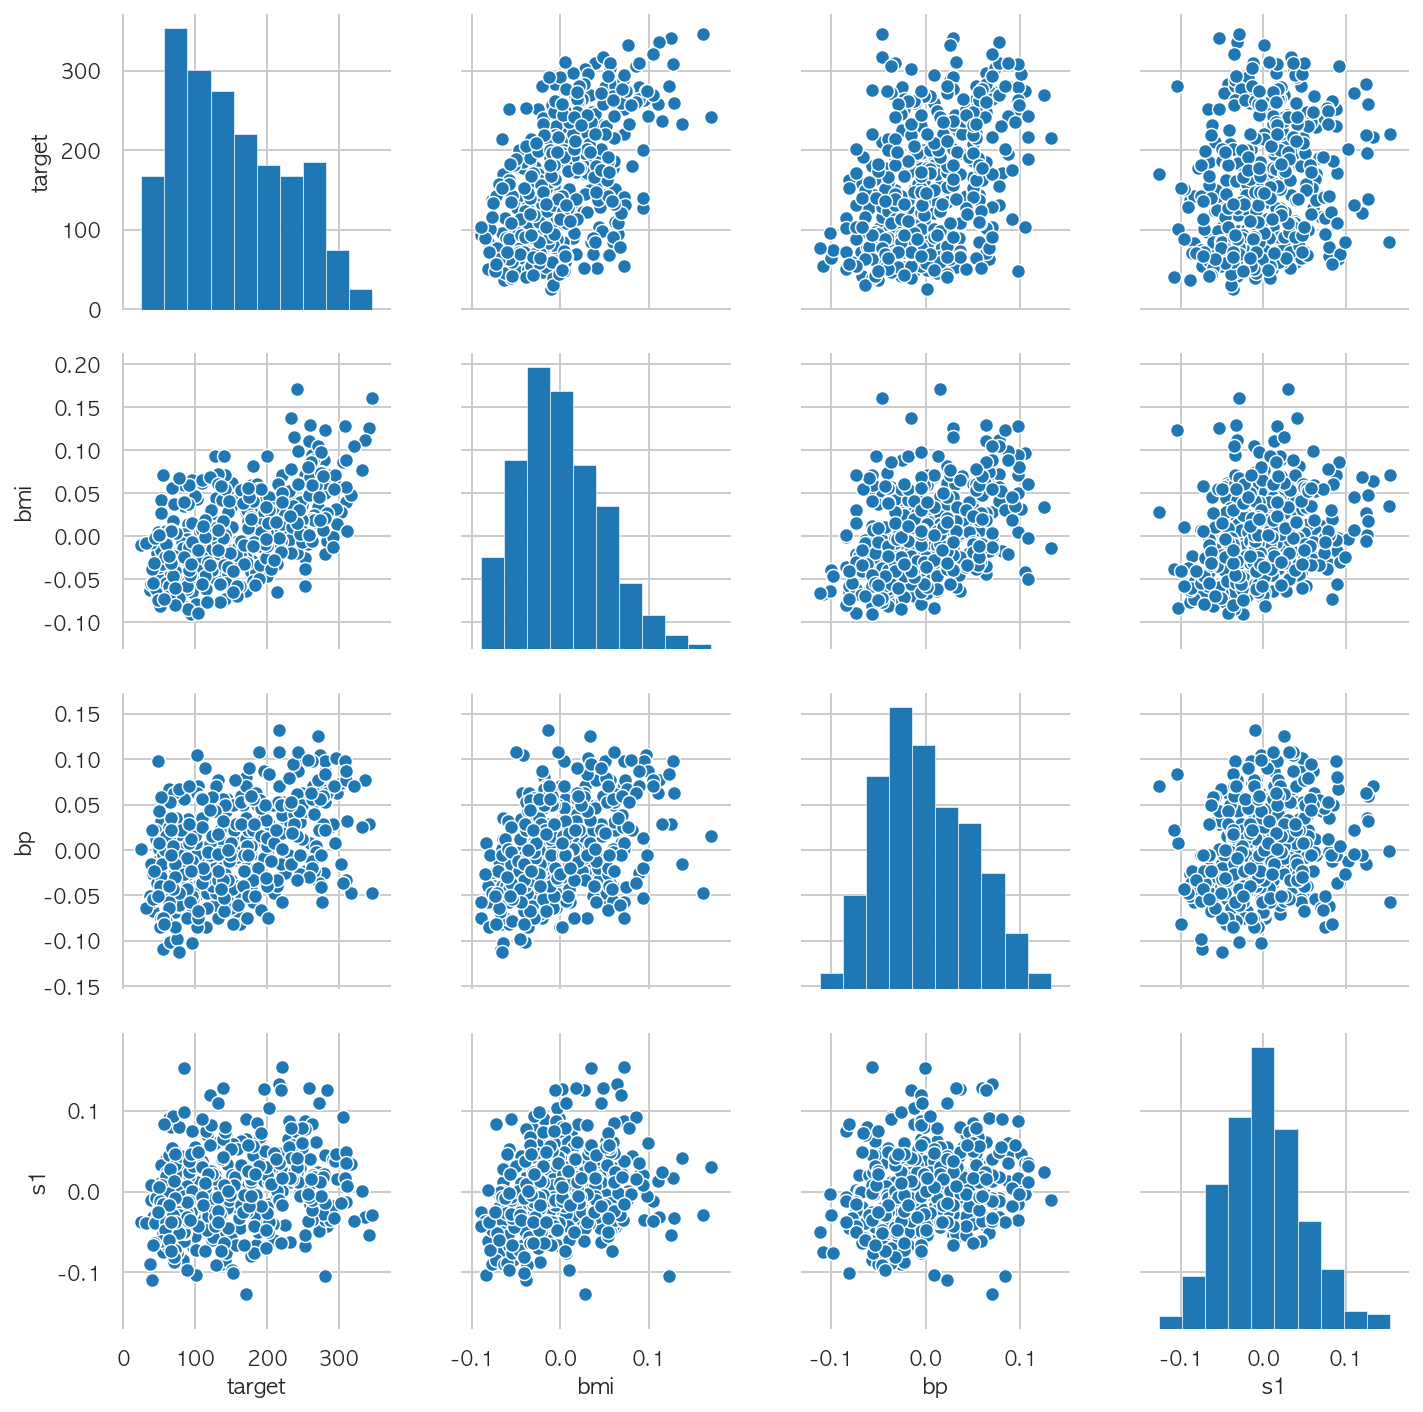

In [11]:
sns.pairplot(df[['target', 'bmi', 'bp', 's1']])
plt.show()

In [16]:
from sklearn.datasets import fetch_california_housing

cal_housing = fetch_california_housing()
df = pd.DataFrame(cal_housing.data, columns=cal_housing.feature_names)
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.33,41.00,6.98,1.02,322.00,2.56,37.88,-122.23
1,8.30,21.00,6.24,0.97,2401.00,2.11,37.86,-122.22
2,7.26,52.00,8.29,1.07,496.00,2.80,37.85,-122.24
3,5.64,52.00,5.82,1.07,558.00,2.55,37.85,-122.25
4,3.85,52.00,6.28,1.08,565.00,2.18,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.56,25.00,5.05,1.13,845.00,2.56,39.48,-121.09
20636,2.56,18.00,6.11,1.32,356.00,3.12,39.49,-121.21
20637,1.70,17.00,5.21,1.12,1007.00,2.33,39.43,-121.22
20638,1.87,18.00,5.33,1.17,741.00,2.12,39.43,-121.32


----
### 가상 데이터 예측

 - n_samles : 표본데이터의 갯수 $N$
 - n_features : 독립 변수의 차원 $M$
 - bias : y절편
 - noise : 출력, 종속변수에 더해지는 잡음 $\epsilon$의 표준편차
 - random_state : 난수발생용 시드값
 - coef : True이면 선형모형의 계수도 출력
 -----
 X : [n_samples , n_feature] : 2차원 배열
     - 독립변수의 표본데이터 행렬 X
 
 y : [n_samples] : 1차원 배열
     - 종속변수의 표존 데이터 벡터 y
      
 w : [n_feature]의 1차원 배열 or [n_feature, n_targets]의 2차원 배열
     - 선형 모형의 계수 벡터 $w$ , 입력인수 coef 가 True인 경우 출력 
 
--- 

make_regression()

- $y = w^Tx + b + \epsilon$


1. 독립변수 데이터 행렬 x를 무작위로 만든다. 
2. 종속변수와 독립변수를 연결하는 가중치 벡터 w를 무작위로 만든다. 
3. X,w를 내적하고 y절편 b 값을 더하여 독립변수와 완전선형인 종속변수 벡터 y_0를 만든다.
4. 기댓값이 0이고 표준편차가 noise인 정규분포를 이용하여 잡음 epsillon을 만든다. 
5. 독립변수와 완전 선형인 종속변수 벡터 y_0에 잡음 epsillon을 더해서 종속변수 데이터 y를 만든다. 

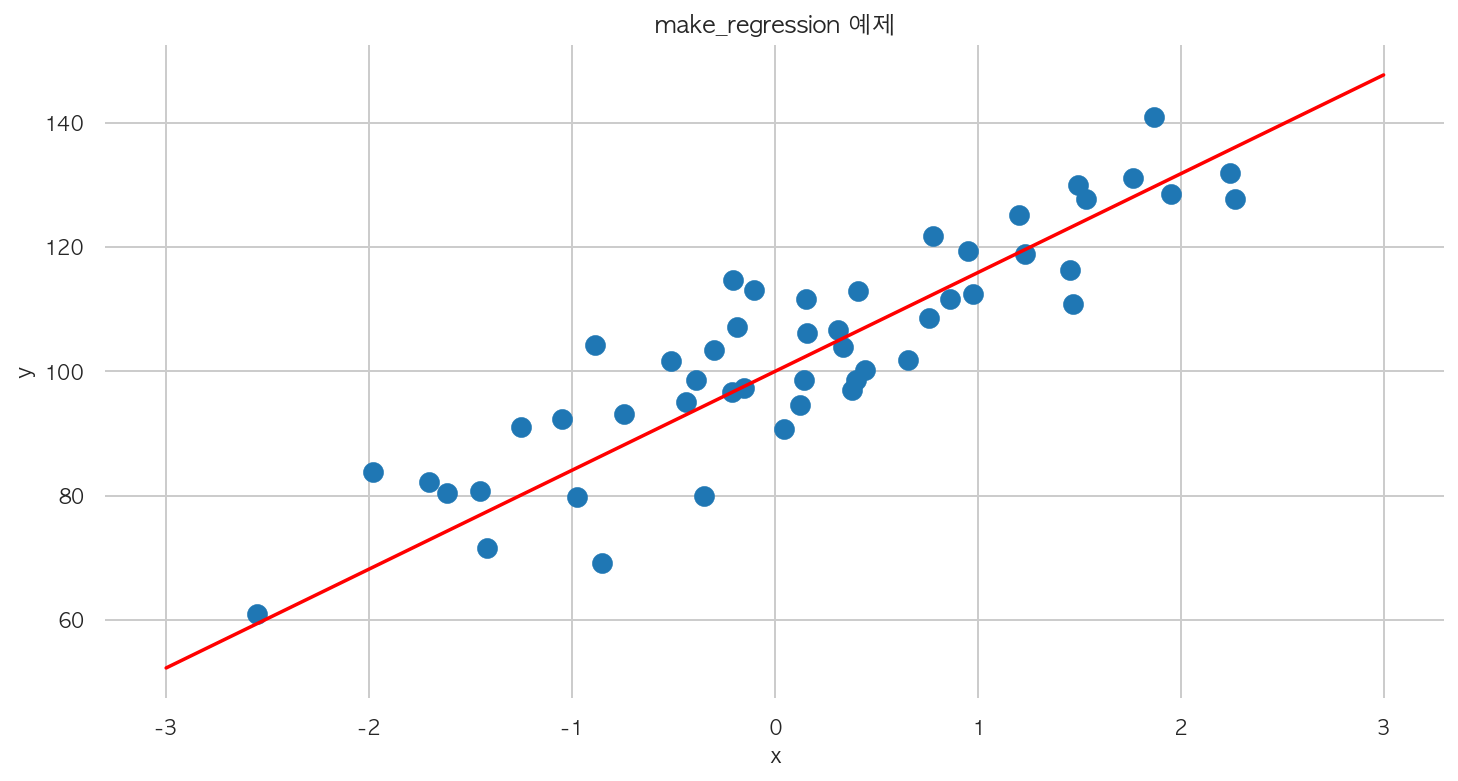

In [37]:
from sklearn.datasets import make_regression

X, y, w = make_regression(
    n_samples=50, n_features=1, bias=100, noise=10, coef=True, random_state=0)

xx = np.linspace(-3, 3, 100)
y0 = w*xx+100
plt.plot(xx, y0, "r-")
plt.scatter(X, y, s=100)
plt.xlabel("x")
plt.ylabel("y")
plt.title("make_regression 예제")
plt.show()

In [44]:
def make_regression2(n_samples, bias, noise, random_stat=0):

    np.random.seed(random_stat)
    X = np.random.normal(size=n_samples)
    w = 100 * np.random.normal(size=1)[0]
    y0 = X*w+bias
    e = np.random.normal(scale=noise, size=n_samples)
    y = y0+e
    return X, y, w

In [50]:
X, y, w = make_regression2(50, 100, 20)

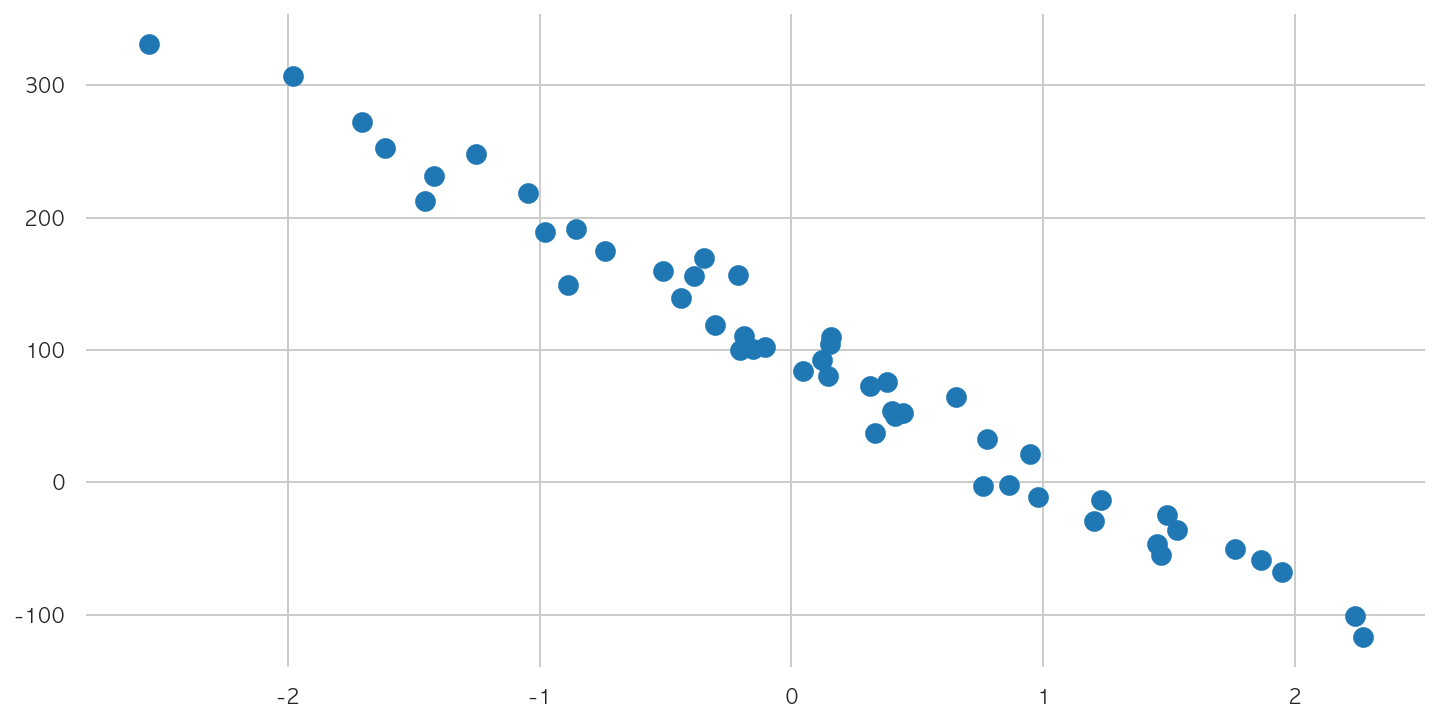

In [51]:
plt.scatter(X, y, s=100)
plt.show()

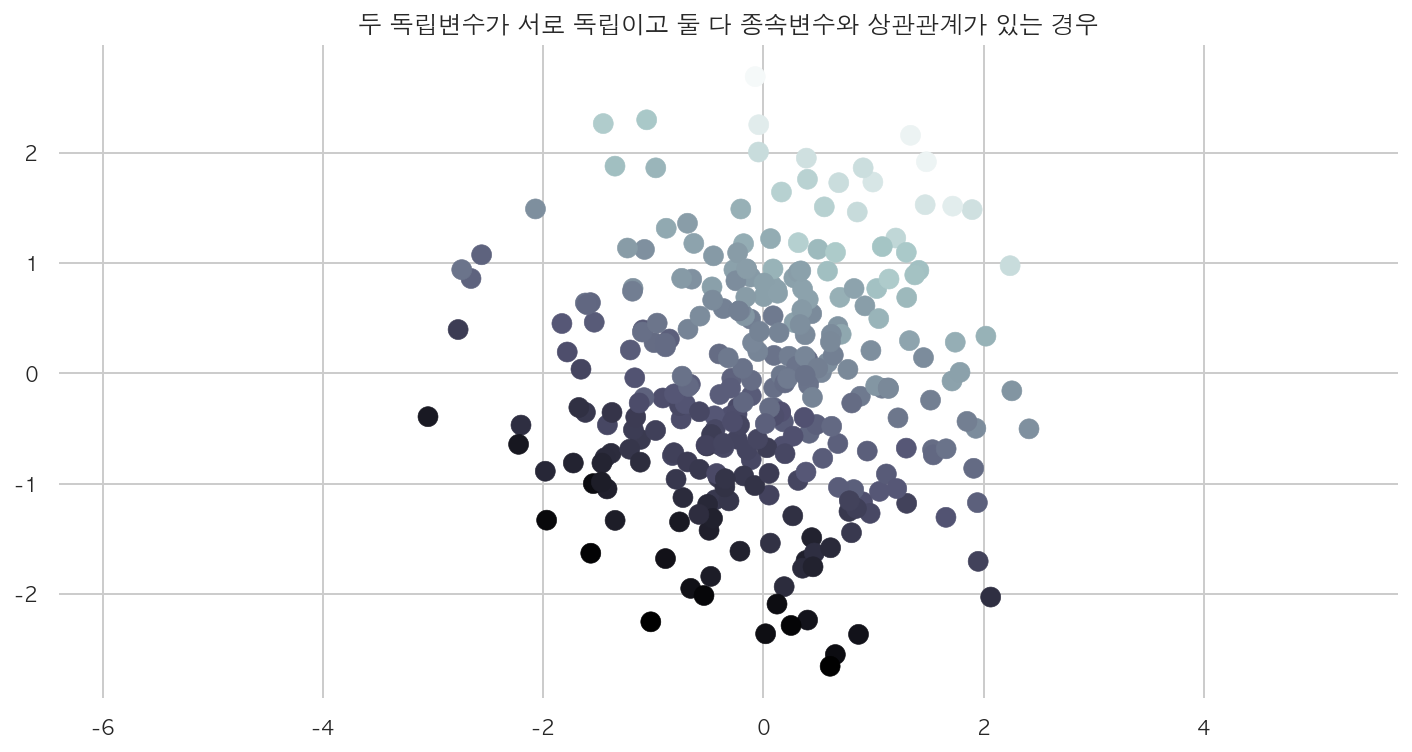

In [54]:
X, y, w = make_regression(
    n_samples=300, n_features=2, noise=10, coef=True, random_state=0
)

plt.scatter(X[:, 0], X[:, 1], c=y, s=100, cmap=mpl.cm.bone)
plt.axis('equal')
plt.title("두 독립변수가 서로 독립이고 둘 다 종속변수와 상관관계가 있는 경우")
plt.show()

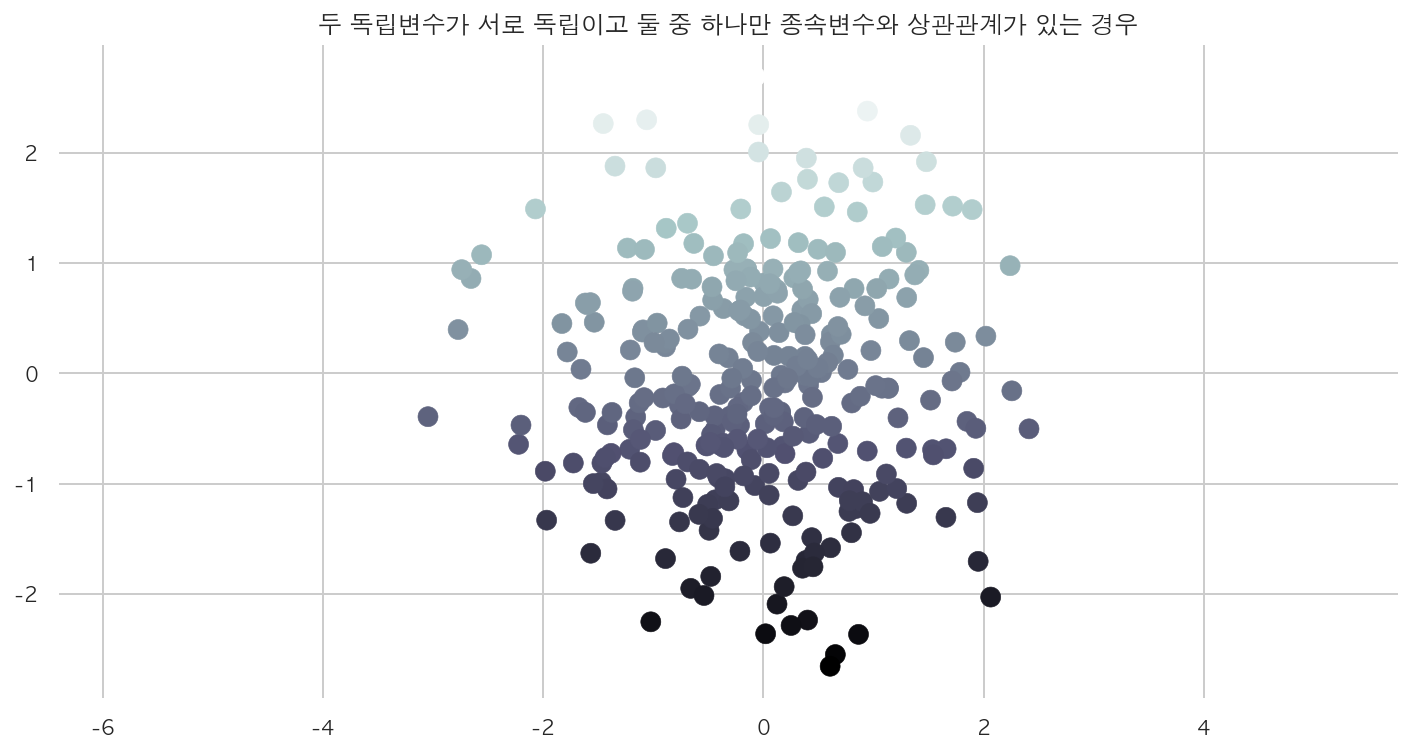

In [56]:
X, y, w = make_regression(
    n_samples=300, n_features=2, n_informative = 1, noise = 0, coef=True, random_state=0
)

plt.scatter(X[:, 0], X[:, 1], c=y, s=100, cmap=mpl.cm.bone)
plt.axis('equal')
plt.title("두 독립변수가 서로 독립이고 둘 중 하나만 종속변수와 상관관계가 있는 경우")
plt.show()

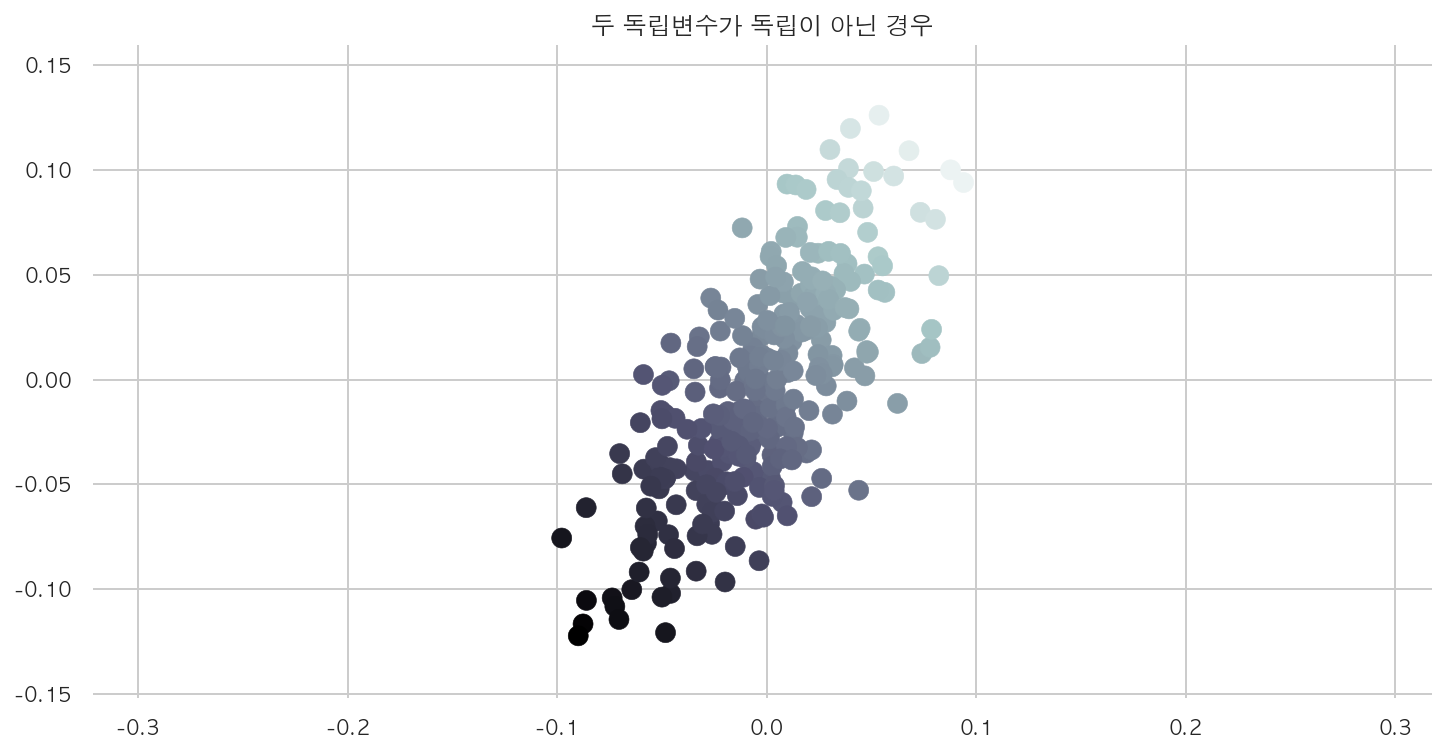

In [58]:
X, y, w = make_regression(
    n_samples=300, n_features=2, effective_rank = 1, noise = 0, coef=True, random_state=0, tail_strength = 0
)

plt.scatter(X[:, 0], X[:, 1], c=y, s=100, cmap=mpl.cm.bone)
plt.axis('equal')
plt.title("두 독립변수가 독립이 아닌 경우")
plt.show()